# Decentmon data preparation

In [1]:
import pandas as pd

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [2]:
SUBDIR = "7"

In [3]:
path = f"{INPUT_DIR}/{SUBDIR}"

f_df = [load_simulation_data(f"{path}/{i}_output.log") for i in range(1, 9)]
f_df[1]

,formula_id,x,cent_trace_len,decent_trace_len,odecent_trace_len,cent_num_mess,decent_num_mess,odecent_num_mess,cent_size_mess,decent_size_mess,odecent_size_mess,cent_nb_progressions,decent_nb_progressions,odecent_nb_progressions,formula,trace
0,0,1,7,8,7,42,6,0,1.0,0.61,0.00,14,52,14,"Glob (Var ""e"")",{a| |c|d|e| | } ; {a| | |d|e|f|g} ; { | | |d|...
1,1,1,2,3,2,7,0,0,1.0,0.00,0.00,3,7,3,"Next (Var ""f"")",{a|b| |d|e| | } ; { |b| |d|e|f| } ; {a| |c|d|...
2,2,1,2,3,2,7,0,0,1.0,0.00,0.00,3,7,3,"Next (Var ""g"")",{a| |c| |e| | } ; {a|b|c|d|e|f|g} ; {a| |c| |...
3,3,1,2,3,2,7,0,0,1.0,0.00,0.00,3,7,3,"Next (Var ""a"")",{a|b| |d| |f|g} ; { | | |d| | | } ; {a|b|c|d|...
4,4,1,2,3,2,7,0,0,1.0,0.00,0.00,3,7,3,"Next (Var ""a"")",{a|b| | | |f|g} ; { | | |d|e|f|g} ; { |b| |d|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,5107,6,28,32,29,189,30,139,1.0,4.92,7.59,647,1533,872,"Ev (And (Next (Var ""c""), And (And (Or (Neg (V...",{a| | | | | |g} ; {a| |c|d|e|f|g} ; {a|b| | |...
5108,5108,6,18,19,19,119,27,252,1.0,114.35,19.79,2090,17686,8532,"Until (Until (And (Or (Ev (Var ""f""), Or (And ...",{ | |c|d|e|f| } ; {a|b|c|d| | |g} ; {a|b| |d|...
5109,5109,6,17,20,18,112,30,180,1.0,315.78,14.88,2974,52631,3182,"Glob (Until (Var ""e"", And (And (And (Or (Next...",{a| |c| |e|f| } ; { |b|c|d| |f| } ; {a| |c| |...
5110,5110,6,18,20,20,119,21,97,1.0,9.66,7.18,190,1595,414,"Or (Or (Ev (And (Neg (Var ""b""), Neg (Var ""e"")...",{a|b|c|d| |f| } ; {a|b|c| | |f|g} ; { |b| |d|...


In [4]:
patterns = range(len(f_df))

In [5]:

strategies_f_df = [split_by_dictionary(f_df[i], STRATEGIES) for i in patterns]

print(f"Datasets: {len(strategies_f_df)}. Strategies: {len(strategies_f_df[0])}. Single dataset Formulae:{len(strategies_f_df[0][0])}")
sep_strat_f_df = [pd.concat(strategies_f_df[i], ignore_index=True) for i in patterns]
sep_strat_f_df[0]

Datasets: 8. Strategies: 3. Single dataset Formulae:5360


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,7,1.00,4,"Glob (Var ""f"")",{ |b|c|d| |f| } ; {a| | |d|e| |g} ; { | | |d|...,orchestration
1,1,1,2,7,1.00,4,"Glob (Var ""f"")",{a|b|c| | |f| } ; {a| | | |e| |g} ; {a|b|c|d|...,orchestration
2,2,1,2,7,1.00,4,"Ev (Var ""e"")",{ |b| | | |f|g} ; {a| |c| |e|f|g} ; { |b|c| |...,orchestration
3,3,1,2,7,1.00,4,"Glob (Var ""a"")",{a|b| | | | |g} ; { | | | |e|f| } ; { |b|c|d|...,orchestration
4,4,1,3,14,1.00,12,"Until (Var ""c"", Var ""d"")",{a|b|c| | |f|g} ; { | |c| |e|f| } ; {a|b| |d|...,orchestration
...,...,...,...,...,...,...,...,...,...
16075,5355,6,21,67,4.68,427,"And (Or (Neg (Var ""f""), And (Or (Or (Ev (Var ...",{a| |c|d| | |g} ; {a|b| | |e| |g} ; { |b|c|d|...,choreography
16076,5356,6,23,153,10.28,864,"Next (Ev (And (Or (And (Or (Var ""e"", Var ""d"")...",{a|b|c| |e|f|g} ; { |b| |d|e| |g} ; { |b| | |...,choreography
16077,5357,6,36,104,4.67,975,"Ev (Neg (Until (Until (Var ""f"", Var ""g""), Unt...",{a| |c|d|e| | } ; { |b| |d| |f| } ; { |b|c|d|...,choreography
16078,5358,6,18,33,2.73,15485,"Ev (Until (Next (Ev (Glob (Var ""d""))), And (E...",{a|b| | |e| | } ; { |b|c|d| | | } ; {a| | |d|...,choreography


In [6]:
merged_metrics_df = [extract_metrics(sep_strat_f_df[i]) for i in patterns]

merged_metrics_df[0].max()

formula_id             5359
strategy      orchestration
value              288742.0
metric            trace_len
dtype: object

## Formula Encoding

In [7]:
%%time
df_f_ops = [extract_ops_new(sep_strat_f_df[i])[0] for i in patterns]

df_f_ops[0]

CPU times: user 4min 9s, sys: 1.28 s, total: 4min 10s
Wall time: 4min 10s


,total_ops_list_1,total_ops_list_10,total_ops_list_100,total_ops_list_101,total_ops_list_102,total_ops_list_103,total_ops_list_104,total_ops_list_105,total_ops_list_106,total_ops_list_107,...,total_ops_list_90,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,4,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16076,11,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16077,12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16078,12,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
df_f_ops = [extract_ops(sep_strat_f_df[i])[0] for i in patterns]

df_f_ops[0]

## Plotting

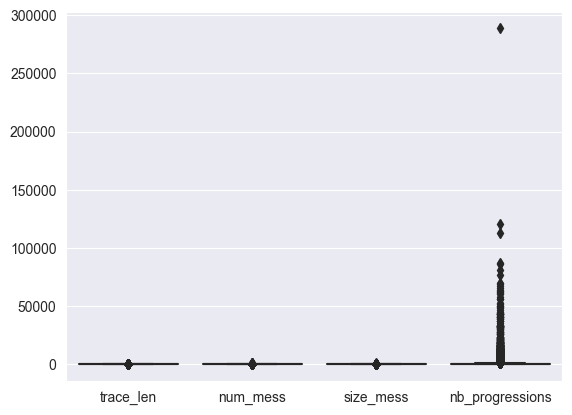

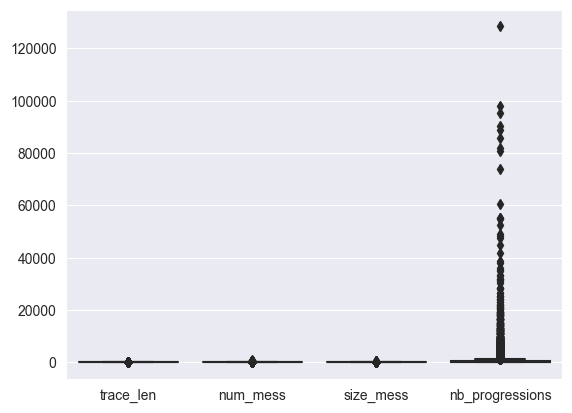

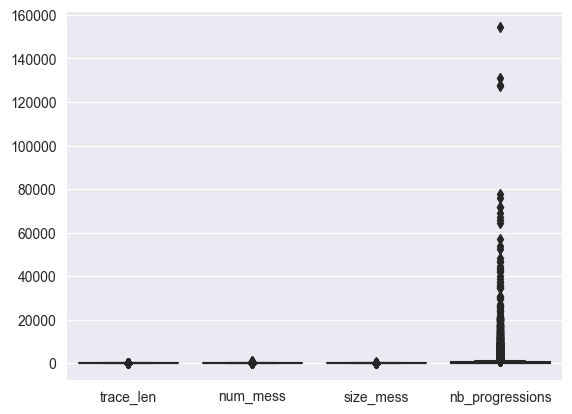

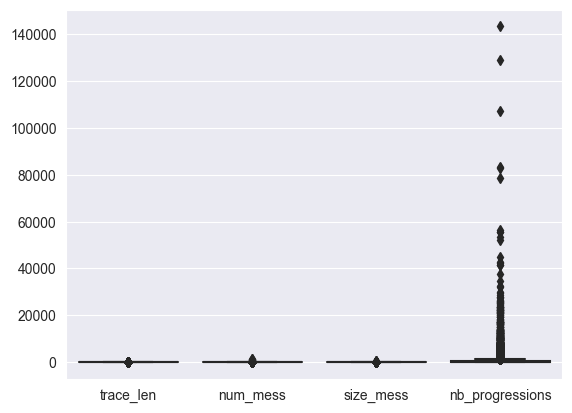

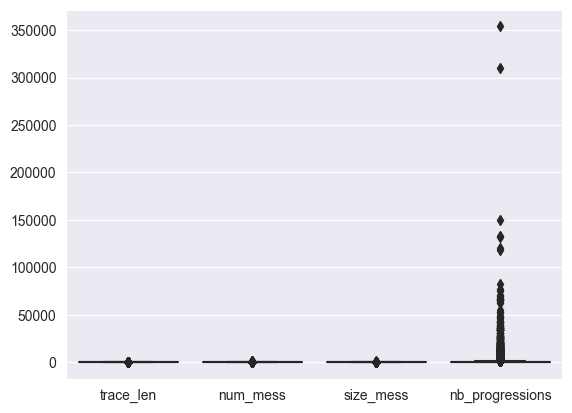

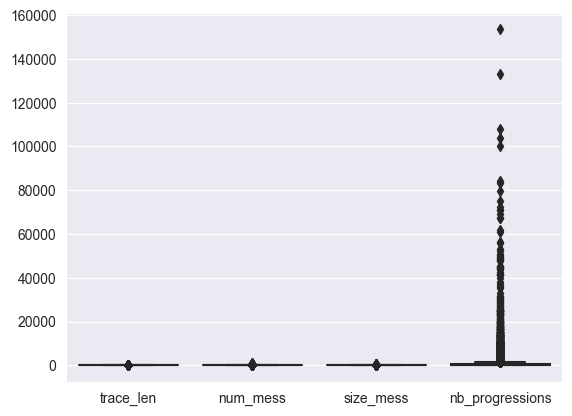

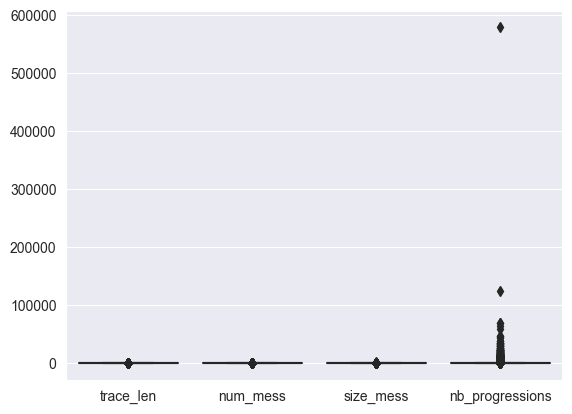

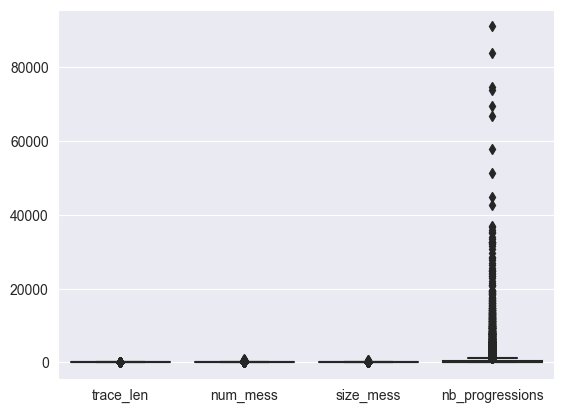

In [9]:
from matplotlib import pyplot as plt

to_drop = ['formula_id', 'x']

for i in patterns:
    cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
    plot = plot_boxplot(cleaned_up_data)
    plt.show()

In [10]:
# from matplotlib import pyplot as plt
#
# COLS = 3
# ROWS = 4
#
# fig, axs = plt.subplots(ncols=COLS, nrows=ROWS, figsize=(14,5))
#
# to_drop = ['formula_id', 'x']
#
# for i in patterns:
#     col = i % COLS
#     row = i % ROWS
#
#     cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
#     plot = plot_boxplot(cleaned_up_data, ax=axs[col][row])
#
# fig

In [11]:
def add_column(df: pd.DataFrame, column: str, value: any) -> pd.DataFrame:
    df[column] = value
    return df

merged_metrics_dfp = [merged_metrics_df[i].copy() for i in patterns]
merged_metrics_dfp = [add_column(merged_metrics_dfp[i].groupby(['strategy', 'metric']).mean(), 'pattern', i) for i in patterns]
[merged_metrics_dfp[i].drop(['formula_id'], axis=1, inplace=True) for i in patterns]
merged_metrics_dfp = [pd.DataFrame(merged_metrics_dfp[i]).reset_index() for i in patterns]
merged_metrics_dfp[0]

,strategy,metric,value,pattern
0,choreography,nb_progressions,629.972575,0
1,choreography,num_mess,41.663060,0
2,choreography,size_mess,3.003360,0
3,choreography,trace_len,13.305410,0
4,migration,nb_progressions,1927.088806,0
5,migration,num_mess,15.942537,0
6,migration,size_mess,10.008698,0
7,migration,trace_len,14.485448,0
8,orchestration,nb_progressions,331.300000,0
9,orchestration,num_mess,80.152612,0


In [12]:
# for i in patterns:
#     grid_plot = plot_grid_barplots(merged_metrics_df[i], grid_cell_field= 'metric',
#               y_axis = 'value', x_axis = 'strategy',
#               order = ['orchestration', 'migration', 'choreography'])


In [13]:
METRICS

{'trace_len': 'Trace Length',
 'num_mess': 'Number of Messages',
 'size_mess': 'Size of Messages',
 'nb_progressions': 'Number of Progressions'}

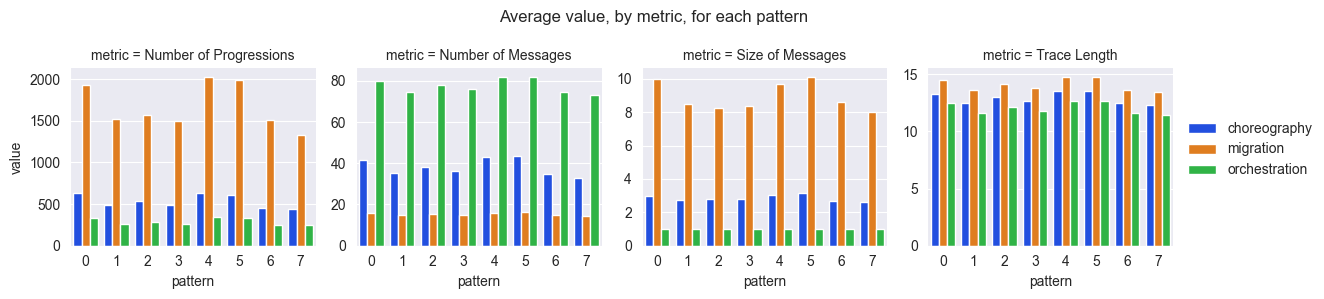

In [14]:
import seaborn as sns
res = pd.concat(merged_metrics_dfp)
res['metric'] = res['metric'].replace(METRICS.keys(), METRICS.values())

g = sns.FacetGrid(res, col="metric", sharey=False)
g.fig.suptitle('Average value, by metric, for each pattern', fontsize=12)

g.map_dataframe(sns.barplot, x='pattern', y='value', hue='strategy', palette='bright')
g.add_legend()

In [15]:
merged_metrics_dfp[1]

,strategy,metric,value,pattern
0,choreography,nb_progressions,483.316315,1
1,choreography,num_mess,35.437207,1
2,choreography,size_mess,2.734980,1
3,choreography,trace_len,12.455986,1
4,migration,nb_progressions,1523.844092,1
5,migration,num_mess,14.929577,1
6,migration,size_mess,8.486837,1
7,migration,trace_len,13.598592,1
8,orchestration,nb_progressions,260.344484,1
9,orchestration,num_mess,74.396909,1


In [16]:
# ndf = merged_metrics.copy()
# ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
# ndf

In [17]:
expanded_f_df = [sep_strat_f_df[i].merge(df_f_ops[i], left_index=True, right_index=True) for i in patterns]
expanded_f_df[0]

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_90,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99
0,0,1,2,7,1.00,4,"Glob (Var ""f"")",{ |b|c|d| |f| } ; {a| | |d|e| |g} ; { | | |d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,7,1.00,4,"Glob (Var ""f"")",{a|b|c| | |f| } ; {a| | | |e| |g} ; {a|b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,7,1.00,4,"Ev (Var ""e"")",{ |b| | | |f|g} ; {a| |c| |e|f|g} ; { |b|c| |...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,7,1.00,4,"Glob (Var ""a"")",{a|b| | | | |g} ; { | | | |e|f| } ; { |b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,3,14,1.00,12,"Until (Var ""c"", Var ""d"")",{a|b|c| | |f|g} ; { | |c| |e|f| } ; {a|b| |d|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,5355,6,21,67,4.68,427,"And (Or (Neg (Var ""f""), And (Or (Or (Ev (Var ...",{a| |c|d| | |g} ; {a|b| | |e| |g} ; { |b|c|d|...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16076,5356,6,23,153,10.28,864,"Next (Ev (And (Or (And (Or (Var ""e"", Var ""d"")...",{a|b|c| |e|f|g} ; { |b| |d|e| |g} ; { |b| | |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16077,5357,6,36,104,4.67,975,"Ev (Neg (Until (Until (Var ""f"", Var ""g""), Unt...",{a| |c|d|e| | } ; { |b| |d| |f| } ; { |b|c|d|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16078,5358,6,18,33,2.73,15485,"Ev (Until (Next (Ev (Glob (Var ""d""))), And (E...",{a|b| | |e| | } ; { |b|c|d| | | } ; {a| | |d|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in patterns:
    expanded_f_df[i].strategy = pd.Categorical(expanded_f_df[i].strategy)
    expanded_f_df[i]['strategy_id'] = expanded_f_df[i].strategy.cat.codes

full_scale_df = pd.concat(expanded_f_df)
full_scale_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_332,total_ops_list_333,total_ops_list_334,total_ops_list_335,total_ops_list_336,total_ops_list_337,total_ops_list_338,total_ops_list_339,total_ops_list_340,total_ops_list_341
0,0,1,2,7,1.00,4,"Glob (Var ""f"")",{ |b|c|d| |f| } ; {a| | |d|e| |g} ; { | | |d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,7,1.00,4,"Glob (Var ""f"")",{a|b|c| | |f| } ; {a| | | |e| |g} ; {a|b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,7,1.00,4,"Ev (Var ""e"")",{ |b| | | |f|g} ; {a| |c| |e|f|g} ; { |b|c| |...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,7,1.00,4,"Glob (Var ""a"")",{a|b| | | | |g} ; { | | | |e|f| } ; { |b|c|d|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,3,14,1.00,12,"Until (Var ""c"", Var ""d"")",{a|b|c| | |f|g} ; { | |c| |e|f| } ; {a|b| |d|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15205,5065,6,20,56,4.24,1842,"Glob (Or (Next (Next (Neg (Until (Var ""d"", Va...",{ |b|c|d|e|f|g} ; {a|b| |d|e|f| } ; {a| |c| |...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15206,5066,6,21,100,7.28,562,"Ev (And (And (Or (Until (Var ""c"", Var ""e""), O...",{ | | | | |f| } ; {a|b|c|d|e|f| } ; {a| | | |...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15207,5067,6,25,164,10.21,5756,Ev (And (Neg (Until (Until (And (Or (Neg (Var...,{a|b|c|d|e| |g} ; {a| |c| | |f|g} ; { |b|c|d|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15208,5068,6,19,174,13.74,2227,"Glob (Or (Until (And (Or (Neg (Var ""c""), Or (...",{a| | | |e|f| } ; {a|b|c| |e|f| } ; {a|b|c| |...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]
# gsdf1 = expanded_df.sort_values(['nb_progressions'],ascending=True).set_index(['formula_id', 'trace'])
# # gsdf1
#
# #idx = (gsdf1['nb_progressions'].min().values.tolist())
# #gsdf2 = gsdf1.loc[gsdf1['nb_progressions'].min()]
# gsdf2 = gsdf1[gsdf1.groupby(['formula_id', 'trace'])['nb_progressions'].transform('first') != gsdf1['nb_progressions']]
# gsdf2

In [20]:
# expanded_df2 = gsdf2.reset_index()
# expanded_df2

In [21]:
# f_ops_stats.hist(column='total_ops')
# f_ops_stats['total_ops'].value_counts()

In [22]:
# TODO:
# -- pycaret for classification
# Action points
# - higher number of nodes (5, 7, 9?)
# - statistics about the learning
# - test other algorithms (pycaret)